## Importing important libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans

## Reading particles data

In [33]:
Data=pd.read_csv('/home/phillemon/Documents/2019 WORK/2019.03.21-nicole0001-test/aspect_ratio_of_particles.csv')

In [34]:
Data.head(6)

55.53896608  46.63792987  1.19085401592247  0.9541992844
0    75.117451    40.145884          1.871112      0.891830
1    81.183097    40.202294          2.019365      0.870486
2    71.227212    31.020802          2.296111      0.853922
3    74.402555    27.003271          2.755316      0.815160
4    68.237536    58.475349          1.166945      0.956381
5    79.904590    66.750994          1.197055      0.930502

## Adding headings

In [36]:
Data.columns=['length','width','aspect_ratio', 'FilleCircularity']
#Data.columns=['length','width','aspect_ratio']
Data.head()

length      width  aspect_ratio  FilleCircularity
0  75.117451  40.145884      1.871112          0.891830
1  81.183097  40.202294      2.019365          0.870486
2  71.227212  31.020802      2.296111          0.853922
3  74.402555  27.003271      2.755316          0.815160
4  68.237536  58.475349      1.166945          0.956381

## Descriptive Statistics

In [37]:
Data.describe()

length      width  aspect_ratio  FilleCircularity
count   25.000000  25.000000     25.000000         25.000000
mean    77.087650  46.547448      1.756229          0.865553
std     21.757225  14.658776      0.522766          0.089266
min     44.231161  22.758898      1.054429          0.670460
25%     68.237536  34.096548      1.251787          0.843710
50%     76.610152  40.515555      1.805276          0.891830
75%     80.443915  61.287030      2.246859          0.930502
max    148.967301  73.025294      2.755316          0.960255

## Scatter plot showing the relationship between width and length of the partcles

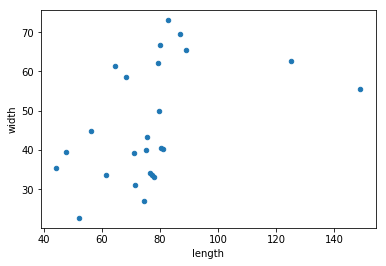

In [38]:
Data.plot(kind='scatter',x='length',y='width')
plt.show()

## Length distribution of the particles

/home/phillemon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


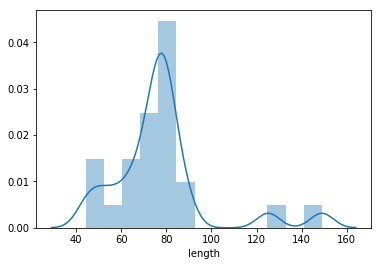

In [39]:
sns.distplot(Data['length'])

## Filled Circularity distribution of the particles

/home/phillemon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


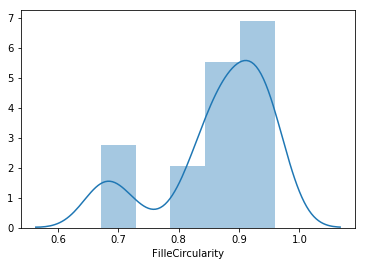

In [40]:
sns.distplot(Data['FilleCircularity'])

## Width distribution of the particles

/home/phillemon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


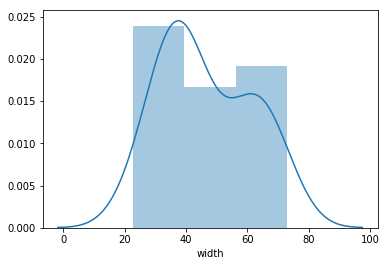

In [41]:
sns.distplot(Data['width'])

## Aspect ratio distribution of the particles

/home/phillemon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


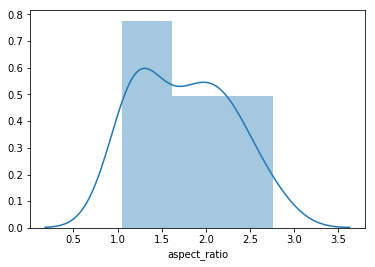

In [42]:
sns.distplot(Data['aspect_ratio'])

## Partitioning the morphology in to sphere, rod and Unusual particles
## in terms of aspect ratio and filled circularity

In [46]:
Data.loc[Data.aspect_ratio <= 2, 'Morphology'] = 'Sphere' 
Data.loc[Data.aspect_ratio > 2, 'Morphology'] = 'Rod'
Data.loc[Data.FilleCircularity< 0.8, 'Morphology']='Unusual'

## Data Frame with the morphology column added

In [59]:
Data.head(10)

length      width  aspect_ratio  FilleCircularity Morphology
0  75.117451  40.145884      1.871112          0.891830     Sphere
1  81.183097  40.202294      2.019365          0.870486        Rod
2  71.227212  31.020802      2.296111          0.853922        Rod
3  74.402555  27.003271      2.755316          0.815160        Rod
4  68.237536  58.475349      1.166945          0.956381     Sphere
5  79.904590  66.750994      1.197055          0.930502     Sphere
6  52.209668  22.758898      2.294033          0.871354        Rod
7  80.443915  40.515555      1.985507          0.879426     Sphere
8  88.964404  65.471279      1.358831          0.678221    Unusual
9  82.618759  73.025294      1.131372          0.932218     Sphere

## Data frame containing the sphere particle measurements

In [48]:
Data.loc[Data['Morphology']=='Sphere']

length      width  aspect_ratio  FilleCircularity Morphology
0   75.117451  40.145884      1.871112          0.891830     Sphere
4   68.237536  58.475349      1.166945          0.956381     Sphere
5   79.904590  66.750994      1.197055          0.930502     Sphere
7   80.443915  40.515555      1.985507          0.879426     Sphere
9   82.618759  73.025294      1.131372          0.932218     Sphere
11  71.025987  39.343557      1.805276          0.901868     Sphere
12  86.934065  69.447994      1.251787          0.916102     Sphere
13  47.529307  39.392808      1.206548          0.951416     Sphere
16  75.526642  43.396985      1.740366          0.913840     Sphere
17  79.437597  62.128767      1.278596          0.927941     Sphere
19  56.343429  44.984591      1.252505          0.951242     Sphere
20  44.231161  35.435399      1.248220          0.960255     Sphere
21  64.622853  61.287030      1.054429          0.941526     Sphere
24  61.506984  33.790156      1.820263          0.892399     Sphere

## Data frame containing the rod particle measurements

In [49]:
Data.loc[Data['Morphology']=='Rod']

length      width  aspect_ratio  FilleCircularity Morphology
1   81.183097  40.202294      2.019365          0.870486        Rod
2   71.227212  31.020802      2.296111          0.853922        Rod
3   74.402555  27.003271      2.755316          0.815160        Rod
6   52.209668  22.758898      2.294033          0.871354        Rod
15  77.274779  33.739508      2.290335          0.843710        Rod
22  76.610152  34.096548      2.246859          0.859982        Rod
23  78.003972  33.040588      2.360853          0.827648        Rod

## Data frame containing the Unusual particle measurements

In [50]:
Data.loc[Data['Morphology']=='Unusual']

length      width  aspect_ratio  FilleCircularity Morphology
8    88.964404  65.471279      1.358831          0.678221    Unusual
10  148.967301  55.456431      2.686204          0.680102    Unusual
14  125.179725  62.720501      1.995834          0.670460    Unusual
18   79.688117  50.055706      1.591989          0.720823    Unusual

## count in terms of morphology

In [51]:
Data['Morphology'].value_counts(dropna=False)

Sphere     14
Rod         7
Unusual     4
Name: Morphology, dtype: int64

## Bar graph showing the morphology 

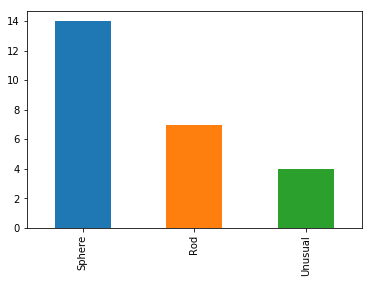

In [52]:
Data['Morphology'].value_counts(dropna=False).plot(kind="bar")
plt.show()

## Percentages morphology in terms of percentage

In [53]:
#Count=Data['Morphology'].value_counts(dropna=False)[0]+Data['Morphology'].value_counts(dropna=False)[1]+Data['Morphology'].value_counts(dropna=False)[2]
Count=Data['Morphology'].value_counts(dropna=False)[0]+Data['Morphology'].value_counts(dropna=False)[1]

### Spheres percentages

In [54]:
Sphere= (Data['Morphology'].value_counts(dropna=False)[0]/Count)*100
print(round(Sphere,1),'% of the spheres')

66.7 % of the spheres


### Rod percentages

In [55]:
Rod= (Data['Morphology'].value_counts(dropna=False)[1]/Count)*100
print(round(Rod,2),'% of the rods')

33.33 % of the rods


### Unsual shape percentages

In [56]:
Unusual= (Data['Morphology'].value_counts(dropna=False)[2]/Count)*100
print(round(Unusual,2),'% of Unusual shape particles')

19.05 % of Unusual shape particles


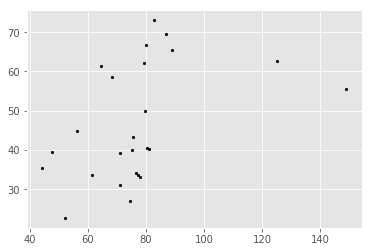

In [67]:


# Getting the values and plotting it
x = Data['length'].values
y = Data['width'].values
X = np.array(list(zip(x, y)))
plt.scatter(x, y, c='black', s=7)
plt.show()

In [68]:
X = np.array(list(zip(x, y)))
X

array([[ 75.11745089,  40.14588418],
       [ 81.18309701,  40.2022944 ],
       [ 71.22721229,  31.02080185],
       [ 74.40255461,  27.00327052],
       [ 68.23753588,  58.47534923],
       [ 79.90458963,  66.75099428],
       [ 52.20966846,  22.75889781],
       [ 80.44391489,  40.5155545 ],
       [ 88.96440371,  65.47127922],
       [ 82.61875868,  73.0252944 ],
       [148.9673009 ,  55.45643105],
       [ 71.02598718,  39.34355702],
       [ 86.93406521,  69.44799427],
       [ 47.52930705,  39.39280762],
       [125.1797252 ,  62.7205011 ],
       [ 77.27477911,  33.73950844],
       [ 75.52664171,  43.39698479],
       [ 79.4375971 ,  62.12876695],
       [ 79.68811732,  50.05570576],
       [ 56.34342851,  44.98459079],
       [ 44.23116058,  35.43539862],
       [ 64.62285268,  61.28703031],
       [ 76.61015226,  34.09654836],
       [ 78.00397236,  33.04058827],
       [ 61.50698432,  33.79015648]])

In [69]:
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[ 78.80099003  63.3303018 ]
 [ 68.17575408  35.92445624]
 [137.07351305  59.08846607]]
[1 1 1 1 0 0 1 1 0 0 2 1 0 1 2 1 1 0 0 1 1 0 1 1 1]


coordinate: [75.11745089 40.14588418] label: 1
coordinate: [81.18309701 40.2022944 ] label: 1
coordinate: [71.22721229 31.02080185] label: 1
coordinate: [74.40255461 27.00327052] label: 1
coordinate: [68.23753588 58.47534923] label: 0
coordinate: [79.90458963 66.75099428] label: 0
coordinate: [52.20966846 22.75889781] label: 1
coordinate: [80.44391489 40.5155545 ] label: 1
coordinate: [88.96440371 65.47127922] label: 0
coordinate: [82.61875868 73.0252944 ] label: 0
coordinate: [148.9673009   55.45643105] label: 2
coordinate: [71.02598718 39.34355702] label: 1
coordinate: [86.93406521 69.44799427] label: 0
coordinate: [47.52930705 39.39280762] label: 1
coordinate: [125.1797252  62.7205011] label: 2
coordinate: [77.27477911 33.73950844] label: 1
coordinate: [75.52664171 43.39698479] label: 1
coordinate: [79.4375971  62.12876695] label: 0
coordinate: [79.68811732 50.05570576] label: 0
coordinate: [56.34342851 44.98459079] label: 1
coordinate: [44.23116058 35.43539862] label: 1
coordinate:

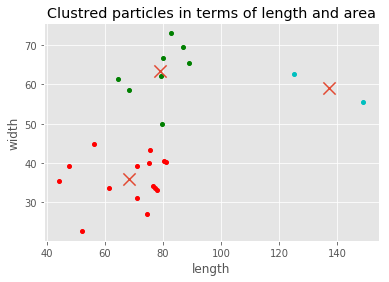

In [70]:
colors = ["g.","r.","c.","y."]

for i in range(len(X)):
    print("coordinate:",X[i], "label:", labels[i])
    
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 8)

plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.title('Clustred particles in terms of length and area')
plt.xlabel('length')
plt.ylabel('width')

plt.show()
		